# Relatório de Análise VII

## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [4]:
dados['Valor'].mean()

5046.172821405663

#### https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [5]:
bairros = dados.Bairro.unique()

In [6]:
type(bairros)

numpy.ndarray

In [7]:
bairros[:8]

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú'], dtype=object)

In [8]:
bairros_2 = ['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca']

In [9]:
selecao = dados['Bairro'].isin(bairros_2)
dados = dados[selecao]
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21812,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0,23.47,Apartamento
21813,Apartamento,Barra da Tijuca,3,2,2,140,5500.0,1900.0,700.0,39.29,Apartamento
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
21820,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [10]:
dados['Bairro'].drop_duplicates() 

0         Copacabana
1    Jardim Botânico
2             Centro
3       Higienópolis
4           Cachambi
5    Barra da Tijuca
Name: Bairro, dtype: object

### Criando grupos

In [11]:
grupo_bairro = dados.groupby('Bairro')

#### Getting more information

In [12]:
for bairro, dados in grupo_bairro:
    print(bairro, type(dados), dados)

Barra da Tijuca <class 'pandas.core.frame.DataFrame'>                      Tipo           Bairro  Quartos  Vagas  Suites  Area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
...                   ...              ...      ...    ...     ...   ...   
21801  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
21811         Apartamento  Barra da Tijuca        2      1       1    85   
21812         Apartamento  Barra da Tijuca        3      2       0    98   
21813         Apartamento  Barra da Tijuca        3      2       2   140   
21820  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         Valor  Condominio    IPT

In [13]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.Valor.mean()}')

Barra da Tijuca -> 7069.552938130986
Cachambi -> 1157.1742424242425
Centro -> 1254.7521865889212
Copacabana -> 4126.677004538578
Higienópolis -> 1006.25
Jardim Botânico -> 8722.357414448668


In [14]:
dados['Valor'].mean()

8722.357414448668

In [15]:
#maneira muito mais simples de calcular a média do grupo é 
grupo_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca    7069.55
Cachambi           1157.17
Centro             1254.75
Copacabana         4126.68
Higienópolis       1006.25
Jardim Botânico    8722.36
Name: Valor, dtype: float64

In [16]:
#Pode-se pegar também a média de uma lista
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Cachambi,1157.17,452.77
Centro,1254.75,422.57
Copacabana,4126.68,1148.68
Higienópolis,1006.25,185.50
Jardim Botânico,8722.36,1059.24


## Estatísticas Descritivas

In [17]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Cachambi,132.0,1157.17,351.49,600.0,900.0,1100.0,1300.0,2800.0
Centro,343.0,1254.75,884.67,400.0,800.0,1000.0,1400.0,12000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Higienópolis,16.0,1006.25,409.42,700.0,800.0,875.0,1100.0,2400.0
Jardim Botânico,263.0,8722.36,9332.73,1550.0,3150.0,4000.0,10000.0,50000.0


In [18]:
# Colocar somente os atributos desejados
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Cachambi,600.0,2800.0,152747.0
Centro,400.0,12000.0,430380.0
Copacabana,100.0,35000.0,10910934.0
Higienópolis,700.0,2400.0,16100.0
Jardim Botânico,1550.0,50000.0,2293980.0


In [19]:
#renomeando os atributos desejados
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Cachambi,600.0,2800.0
Centro,400.0,12000.0
Copacabana,100.0,35000.0
Higienópolis,700.0,2400.0
Jardim Botânico,1550.0,50000.0


In [21]:
%matplotlib inline
#Jupyter configuration

import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))#size of figure to create

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

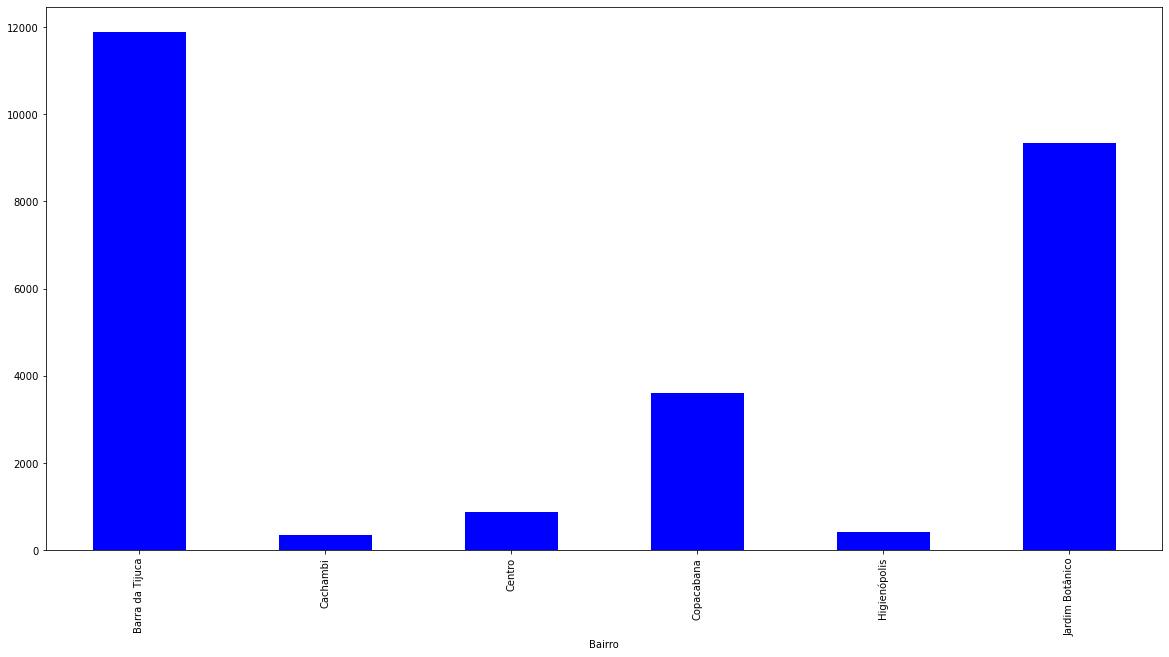

In [28]:
grupo_bairro['Valor'].std().plot.bar(color ='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

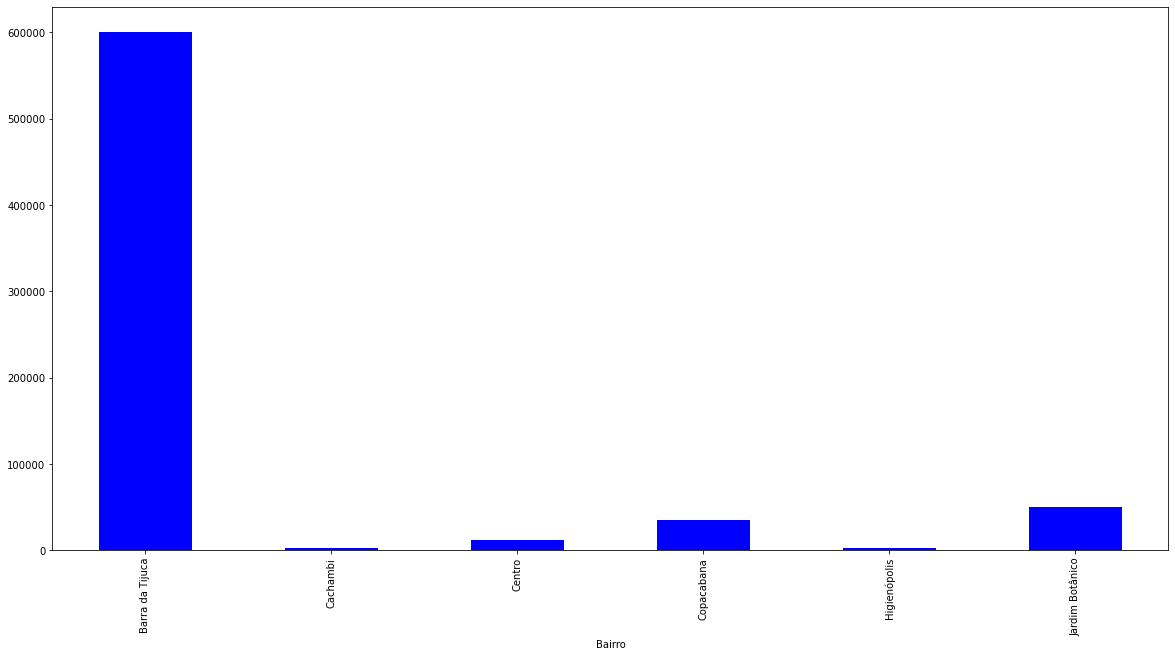

In [31]:
grupo_bairro['Valor'].max().plot.bar(color ='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize':30})